In [1]:
import numpy as np
import matplotlib.pyplot as plt
import peakutils
from peakutils import indexes, peak

x = np.array([0., 20., 40., 60., 80., 100., 120., 140., 160., 180., 200.])
y = np.array([1.47569980e-16, 3.75195412e-01, 6.93360468e-01, 9.09192585e-01, 1.00000000e+00, 9.61381514e-01, 8.17731984e-01, 6.06581116e-01, 3.73329928e-01, 1.60828981e-01, 7.49408815e-04])

# Find the indices of the peaks
peak_indices = indexes(y, thres=0.5, min_dist=1)

# Get the index of the highest peak
max_index = peak_indices[np.argmax(y[peak_indices])]

# Calculate the FWHM
half_max = y[max_index] / 2.0
left_index = np.argmin(np.abs(y[:max_index] - half_max))
right_index = np.argmin(np.abs(y[max_index:] - half_max)) + max_index
fwhm = x[right_index] - x[left_index]

print("Peak Index:", max_index)
print("FWHM:", fwhm)
print("")


Peak Index: 4
FWHM: 120.0



In [16]:
fits = peakutils.peak.gaussian_fit(x, y, center_only=False)

In [17]:
def gaussian(x, amplitude, mean, stddev):
    y = amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

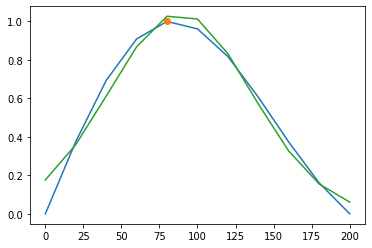

In [18]:
gaus = gaussian(x,fits[0], fits[1], fits[2])
plt.plot(x,y)
plt.plot(x[4],y[4],'o')
plt.plot(x, gaus)


In [119]:
import peakutils
from peakutils import indexes, peak

def gaussian(x, amplitude, mean, stddev):
    y = amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

def FWHM(x,y):
    
    fits = peakutils.peak.gaussian_fit(x, y, center_only=False)
    x_new = np.linspace(x[0],x[-1],100)
    gaus_y = gaussian(x_new,fits[0], fits[1], fits[2])
    
    # Find the indices of the peaks
    peak_indices = indexes(gaus_y, thres=0.5, min_dist=1)

    # Get the index of the highest peak
    max_index = peak_indices[np.argmax(gaus_y[peak_indices])]

    # Calculate the FWHM
    half_max = gaus_y[max_index] / 2.0
    left_index = np.argmin(np.abs(gaus_y[:max_index] - half_max))
    right_index = np.argmin(np.abs(gaus_y[max_index:] - half_max)) + max_index
    fwhm = x_new[right_index] - x_new[left_index]
    
    # Find central frequency from peak index:
    central_freq = x_new[max_index]

    print("Peak Index:", max_index)
    print("Central Frequency:", central_freq)
    print("FWHM:", fwhm)
    print("")
    return x_new,gaus_y, max_index, central_freq, fwhm

In [120]:
x_new,gaus,index, central, fwhm = FWHM(x,y)

Peak Index: 44
Central Frequency: 88.8888888888889
FWHM: 111.11111111111111



Text(0.5, 1.0, 'central freq = 88.89 $\\pm$ 55.56 kHz, FWHM = 111.11 kHz')

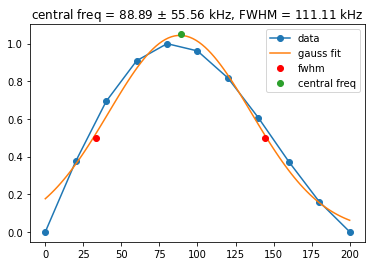

In [133]:
xmin = central-fwhm/2
xmax = central+fwhm/2

plt.plot(x,y, '-o',label='data')
plt.plot(x_new,gaus, label='gauss fit')
plt.plot(central-fwhm/2,0.5, 'o', color='red', label='fwhm')
plt.plot(central+fwhm/2,0.5, 'o', color='red')
plt.plot(central,1.05, 'o', label='central freq')
plt.legend()
plt.axhline(0.5,xmin = 30, xmax = 130)
plt.axhline(y =0.5, xmin = xmin, xmax = xmax, color='r', linestyle = '--')
plt.title('central freq = 88.89 $\pm$ 55.56 kHz, FWHM = 111.11 kHz')

# real data

Text(0.5, 0, 'Frequency (kHz)')

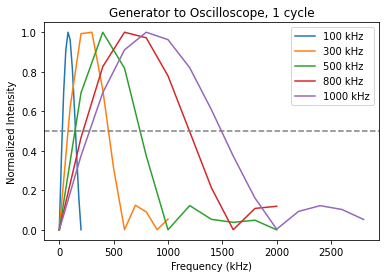

In [122]:
from myfft import myfft
exec(open('ComputeDelays.py').read())
GS100=timedata('GS100')
readlabdat('may16_1.csv',GS100)
GS300=timedata('GS300')
readlabdat('may16_2.csv',GS300)
GS500=timedata('GS500')
readlabdat('may16_3.csv',GS500)
GS800=timedata('GS800')
readlabdat('may16_4.csv',GS800)
GS1000=timedata('GS1000')
readlabdat('may16_5.csv',GS1000)

f1,FT1=myfft(GS100.time, GS100.data)
f2,FT2=myfft(GS300.time, GS300.data)
f3,FT3=myfft(GS500.time, GS500.data)
f4,FT4=myfft(GS800.time, GS800.data)
f5,FT5=myfft(GS1000.time, GS1000.data)


plt.title('Generator to Oscilloscope, 1 cycle')
plt.plot(f1[1000:1011],np.abs(FT1[1000:1011])/max(np.abs(FT1[1000:1011])),label='100 kHz')
plt.plot(f2[1000:1011],np.abs(FT2[1000:1011])/max(np.abs(FT2[1000:1011])),label='300 kHz')
plt.plot(f3[1000:1011],np.abs(FT3[1000:1011])/max(np.abs(FT3[1000:1011])),label='500 kHz')
plt.plot(f4[1000:1011],np.abs(FT4[1000:1011])/max(np.abs(FT4[1000:1011])),label='800 kHz')
plt.plot(f5[1000:1015],np.abs(FT5[1000:1015])/max(np.abs(FT5[1000:1015])),label='1000 kHz')
plt.axhline(y = 0.5, color = 'grey', linestyle = '--')
#plt.xlim([0,1500])
plt.legend(loc=1)
plt.ylabel('Normalized Intensity')
plt.xlabel('Frequency (kHz)')

In [123]:
print('100kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f1[1000:1018],np.abs(FT1[1000:1018])/max(np.abs(FT1[100:1018])))
print('300kHz')
x2,gaus2,index2, central2, fwhm2 = FWHM(f2[1000:1011],np.abs(FT2[1000:1011])/max(np.abs(FT2[1000:1011])))
print('500kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f3[1000:1011],np.abs(FT3[1000:1011])/max(np.abs(FT3[1000:1011])))
print('800kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f4[1000:1011],np.abs(FT4[1000:1011])/max(np.abs(FT4[1000:1011])))
print('1000kHz')
x5,gaus5,index5, central5, fwhm5 = FWHM(f5[1000:1015],np.abs(FT5[1000:1015])/max(np.abs(FT5[1000:1015])))
#gaus,index, central, fwhm = FWHM(f3,np.abs(FT1)/max(np.abs(FT1)))

100kHz
Peak Index: 26
Central Frequency: 89.29292929292713
FWHM: 109.89898989898724

300kHz
Peak Index: 26
Central Frequency: 262.62626262626515
FWHM: 333.33333333333655

500kHz
Peak Index: 22
Central Frequency: 444.4444444444487
FWHM: 525.2525252525303

800kHz
Peak Index: 35
Central Frequency: 707.0707070707139
FWHM: 888.8888888888976

1000kHz
Peak Index: 31
Central Frequency: 876.7676767676852
FWHM: 1103.0303030303135



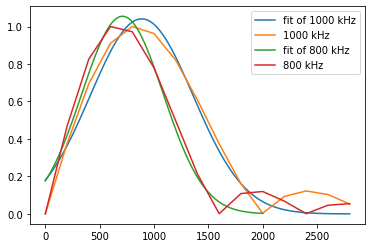

In [125]:
plt.plot(x5, gaus5,label='fit of 1000 kHz')
plt.plot(f5[1000:1015],np.abs(FT5[1000:1015])/max(np.abs(FT5[1000:1015])),label='1000 kHz')
plt.plot(x4, gaus4 ,label='fit of 800 kHz')
plt.plot(f4[1000:1015],np.abs(FT4[1000:1015])/max(np.abs(FT4[1000:1015])),label='800 kHz')
plt.legend()